In [1]:
# 분석에 사용할 데이터 패키지 등 다운로드
!wget https://raw.githubusercontent.com/initialsw/TextDataLecture/main/금통위의사록.tsv

!pip install nltk
!pip install konlpy
!pip install wordcloud

import nltk
nltk.download('punkt')

--2022-10-04 08:51:04--  https://raw.githubusercontent.com/initialsw/TextDataLecture/main/%EA%B8%88%ED%86%B5%EC%9C%84%EC%9D%98%EC%82%AC%EB%A1%9D.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15195720 (14M) [text/plain]
Saving to: ‘금통위의사록.tsv’

금통위의사록.tsv    100%[===================>]  14.49M  --.-KB/s    in 0.08s   

2022-10-04 08:51:05 (188 MB/s) - ‘금통위의사록.tsv’ saved [15195720/15195720]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.8 MB/s 
     |████████████████████████████████| 453 kB 75.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# 한글 폰트 설치 (Wordcloud 한글깨짐 현상)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,719 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [3]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

# 설치된 글꼴 파일 목록을 보여주기
[f for f in sys_font if "Nanum" in f]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

## 5. 텍스트 분석 심화

### 5-1. Wordcloud를 사용한 시각화

In [5]:
# 필요한 패키지 로드
# WordCloud 시각화
from wordcloud import WordCloud
# 형태소 분석, 명사 추출
from konlpy.tag import Kkma
# 단어 카운트
from collections import Counter
# 데이터 프레임 사용
import pandas as pd

In [6]:
data = pd.read_csv("금통위의사록.tsv", encoding="utf-8", sep="\t", parse_dates=["날짜"], index_col="날짜")

In [7]:
data.head()

,회차,의사록
날짜,,
2003-09-09,2003년도 제18차,金融通貨委員會 議事錄\n2003년도 제18차 회의\n1. 일 자 2003년 9월 9...
2003-10-09,2003년도 제20차,金融通貨委員會 議事錄\n2003년도 제20차 회의\n1. 일 자 2003년 10월 ...
2003-11-06,2003년도 제22차,金融通貨委員會 議事錄\n2003년도 제22차 회의\n1. 일 자 2003년 11월 ...
2003-12-11,2003년도 제25차,金融通貨委員會 議事錄\n2003년도 제25차 회의\n1. 일 자 2003년 12월 ...
2004-05-06,2004년도 제10차,金融通貨委員會 議事錄\n2004년도 제10차 회의\n1. 일 자 2004년 5월 6...


In [9]:
data["의사록"][0]

'金融通貨委員會 議事錄\n2003년도 제18차 회의\n1. 일 자 2003년 9월 9일 \n2. 장 소 금융통화위원회 회의실\n3. 출석위원 박 승 의 장 \n 김 원 태 위 원\n 남 궁 훈 위 원\n 김 병 일 위 원\n 김 태 동 위 원\n 최 운 열 위 원\n 이 근 경 위 원\n4. 결석위원 없 음\n5. 참 여 자 이 성 태 부총재 이 상 용 감사\n 최 창 호 부총재보 정 규 영 부총재보\n 이 상 헌 부총재보 정 방 우 부총재보\n 이 주 열 조사국장 박 재 환 정책기획국장\n 윤 한 근 금융시장국장 이 영 균 국제국장\n 김 석 종 금융통화위원회실장 양 정 균 공보실장\n6. 회의경과\n〈의안 제32호 ― 통화정책방향〉\n 전일 개최된 동향보고회의에서 조사국장이 보고 제111호 - ｢국내외 경제동향｣, 국제국장이 보고 제112호 - ｢외환․국제금융 동향｣, 그리고 금융시장국장이 보고 제113호 - ｢금융시장 동향｣에 대하여 보고하였음\n 본회의에서는 의장이 ｢한국은행법｣ 제28조에 의거하여 의안 제32호 - ｢통화정책방향｣을 상정하였음\n 위원 토의내용\n｢국내외 경제동향｣과 관련하여, 일부 위원은 최근 부동산가격의 국부적인 급등 현상이 중앙은행의 콜금리 목표 인하에 기인하는 것으로 일부 오해를 받고 있다며 최근 중앙은행이 시행한 콜금리 목표 인하조치는 수익률곡선, 내외자본이동 등 시장의 움직임이 반영된 시장추수형의 조치였다는 점 등을 고려할 때 부동산가격 급등의 원인으로 금리 요인 외에 다른 어떤 요인들이 있는지 등을 종합적으로 분석하여 일반 국민들이 오해하고 있는 부분에 대해서는 보다 적극적으로 해명할 필요가 있다는 견해를 개진하였음\n동 위원은 경기동행지수 순환변동치가 금년 1월을 고점으로 하여 2월 이후 하락세를 이어가고 있는데 이와 관련하여 과연 경기저점이 언제쯤 도래할지 예상해 보기 위해서는 최근의 경기부진과 밀접한 관련이 있는 소비위축 현상이 언제쯤 끝날 것인지를 전망해 보는 것이 중요할 것으로 보인다는 견해를 피력하였음\n또한 동

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  # Remove the CWD from sys.path while we load stuff.


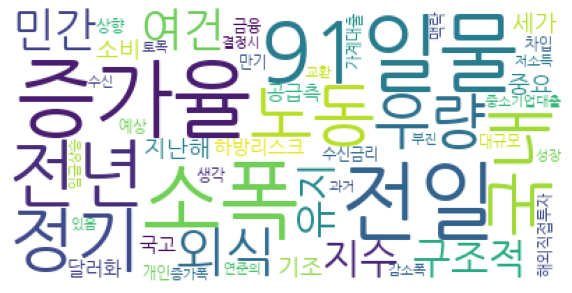

In [10]:
import matplotlib.pyplot as plt

# 형태소 분석기 초기화
kkma = Kkma()

# 의사록 연도
YEAR = 2022

# 의사록을 분석하여 WordCloud로 시각화
sample = data.loc[str(YEAR) + "-01-01":str(YEAR+1) + "-01-01"]

# 토큰을 저장할 변수
tokens = []

# 의사록 본문에서 명사를 추출
for contents in sample["의사록"]:
  nouns = set(kkma.nouns(contents))
  # 단어가 두글자 이상인 경우만 추가
  for n in nouns:
    if len(n) > 1:
      tokens.append(n)

# 가장 많이 나온 단어 50개를 선택
counts = Counter(tokens)
tags = counts.most_common(50) 

# wordcloud 생성
wc = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [12]:
# 가장 많이 사용된 단어 10개
print(counts.most_common(10))

[('소폭', 6), ('91일물', 6), ('전일', 6), ('증가율', 6), ('전년', 6), ('정기', 6), ('국내', 6), ('노동', 6), ('우량', 6), ('외식', 6)]


### 4.2. TF-IDF(Term Frequency-Inverse Document Frequency)

In [13]:
import pandas as pd

In [14]:
data = pd.read_csv("금통위의사록.tsv", encoding="utf-8", sep="\t", parse_dates=["날짜"], index_col="날짜")

In [15]:
# 2022년도 의사록만 사용
data = data.loc["2022-01-01":]
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,회차,의사록
날짜,,
2022-05-26,2022년도 제10차,2022년도 제10차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자\n202...
2022-07-13,2022년도 제13차,2022년도 제13차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자\n202...
2022-08-25,2022년도 제16차,2022년도 제16차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자\n202...
2022-01-14,2022년도 제1차,2022년도 제1차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2022년...
2022-02-24,2022년도 제4차,2022년도 제4차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2022년...


In [16]:
from konlpy.tag import Kkma
from nltk import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# 형태소 분석기 초기화
kkma = Kkma()

# 의사록 본문
corpus = data["의사록"].tolist()

# 의사록을 문장단위로 분리한 후 명사만 추출하여 분석에 사용
corpus_edit = []
for doc in corpus:
  sentences = sent_tokenize(doc)
  for s in sentences:
    tmp_sent = kkma.nouns(s)
    str_tmp_sent = ""
    for n in tmp_sent:
      str_tmp_sent += n + " "
    corpus_edit.append(str_tmp_sent.strip())

# tf-idf 구하기
tfidfv = TfidfVectorizer().fit(corpus_edit)
tfidf_array = tfidfv.transform(corpus).toarray()

In [17]:
corpus_edit[20:23]

['전체적 성장 상 하방 리스크 혼재 상황',
 '동 위원 주요국 중 미국 성장률 예측 예측치가 치가 종전 하락 점 눈 언급',
 '금년 미국 소매 소매판매액 판매액 증가율 지속적 하락 대규모 축적 저축 가계 가계소득 소득 여건 펜트 펜트업 업 소비 지속 이유 무엇 관련 관련부서 부서 질의']

In [18]:
print(tfidfv.vocabulary_)

{'2022': 98, '2022년': 99, '10': 3, '10차': 15, '금융': 832, '금융통화위원회': 868, '통화': 3685, '위원회': 2597, '의사록': 2704, '5월': 207, '26': 117, '26일': 118, '회의실': 4034, '출석': 3594, '출석위원': 3595, '위원': 2595, '결석': 452, '결석위원': 453, '부총재': 1635, '부총재보': 1636, '외자': 2488, '외자운용원장': 2489, '운용': 2552, '원장': 2575, '조사': 3215, '조사국장': 3217, '국장': 744, '금융안정국장': 853, '안정': 2284, '통화정책국장': 3694, '정책': 3137, '국제': 745, '국제국장': 747, '경제': 495, '경제연구원장': 508, '연구원장': 2396, '공보관': 619, '금융통화위원회실장': 869, '실장': 2232, '시장': 2157, '시장총괄팀장': 2169, '총괄': 3544, '팀장': 3738, '의사': 2702, '의사팀장': 2705, '회의': 4032, '회의경과': 4033, '경과': 464, '의결': 2693, '의결안건': 2697, '안건': 2279, '의안': 2706, '제14호': 3170, '14': 32, '통화정책방향': 3697, '방향': 1489, '전일': 3071, '개최': 402, '동향': 1244, '동향보고회의': 1245, '보고': 1535, '34': 142, '34호': 145, '65378': 214, '경제전망': 511, '전망': 3040, '65379': 215, '35': 146, '35호': 147, '외환': 2506, '국제금융': 748, '금융시장국장': 851, '36': 148, '36호': 150, '금융시장': 850, '보고하': 1538, '본회의': 1585, '의장': 2708, '보고내용': 15

In [19]:
# 각 문서별 단어의 중요도(TF-IDF) 구하기
print("TF-IDF(금융통화위원회) :", tfidf_array[:, tfidfv.vocabulary_["금융통화위원회"]])

TF-IDF(금융통화위원회) : [0.01636868 0.01711162 0.01502903 0.01499875 0.01512425 0.0176329 ]


In [20]:
print("TF-IDF(한국은행) :", tfidf_array[:, tfidfv.vocabulary_["한국은행"]])

TF-IDF(한국은행) : [0.02942232 0.03075773 0.03376792 0.04717981 0.02718548 0.03169472]


In [21]:
print("TF-IDF(회의) :", tfidf_array[:, tfidfv.vocabulary_["회의"]])

TF-IDF(회의) : [0.         0.00673929 0.         0.         0.         0.        ]


In [22]:
print("TF-IDF(실장) :", tfidf_array[:, tfidfv.vocabulary_["실장"]])

TF-IDF(실장) : [0. 0. 0. 0. 0. 0.]


### 4.3. 주제모델링(Topic Modeling)

In [23]:
# gensim 패키지 설치
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import pandas as pd

In [25]:
# 금통위 의사록 데이터 로드
data = pd.read_csv("금통위의사록.tsv", encoding="utf-8", sep="\t", parse_dates=["날짜"], index_col="날짜")
# 2020년 이후의 의사록 사용
data = data.loc["2020-01-01":]
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  after removing the cwd from sys.path.


,회차,의사록
날짜,,
2020-05-28,2020년도 제12차,2020년도 제12차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2020...
2020-07-16,2020년도 제15차,2020년도 제15차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2020...
2020-08-27,2020년도 제19차,2020년도 제19차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2020...
2020-01-17,2020년도 제1차,2020년도 제1차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2020년...
2020-10-14,2020년도 제22차,2020년도 제22차\n금융통화위원회 의사록\n한 국 은 행\n1. 일 자 2020...


In [26]:
from konlpy.tag import Kkma
from nltk import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import notebook

# 형태소 분석기 초기화
kkma = Kkma()

# 의사록 본문
corpus = data["의사록"].tolist()

# 의사록을 문장단위로 분리한 후 명사만 추출하여 분석에 사용
corpus_edit = []

for i in notebook.tqdm(range(len(corpus)), desc="의사록 분석"):
  sentences = sent_tokenize(corpus[i])
  for s in sentences:
    tmp = kkma.nouns(s)
    new_tmp = []
    # 단어 길이가 2글자 이상인 경우만 포함
    for t in tmp:
      if len(t) > 1:
        new_tmp.append(t)
    corpus_edit.append(new_tmp)

의사록 분석:   0%|          | 0/23 [00:00<?, ?it/s]

In [27]:
for i in range(0, 5):
  print(corpus_edit[i])

['2020', '2020년', '12', '12차', '금융', '금융통화위원회', '통화', '위원회', '의사록']
['2020', '2020년', '5월', '28', '28일']
['금융', '금융통화위원회', '통화', '위원회', '회의실']
['출석', '출석위원', '위원']
['결석', '결석위원', '위원']


In [28]:
# LDA를 사용한 주제분석
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

# 문장을 gensim LDA를 사용할 수 있는 형태로 변환
dictionary = Dictionary(corpus_edit)
corpus = [dictionary.doc2bow(text) for text in corpus_edit]

# 주제 수
NUM_TOPICS = 10

# LDA 실행
lda = LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary)

In [29]:
# 주제 출력하기
topics = lda.print_topics(num_words=10)
for topic in topics:
  print(topic)

(0, '0.020*"투자" + 0.017*"관련" + 0.015*"증가" + 0.014*"부서" + 0.014*"관련부서" + 0.013*"지속" + 0.012*"수출" + 0.012*"전망" + 0.011*"국내" + 0.010*"자금"')
(1, '0.025*"관련" + 0.020*"위원" + 0.019*"시장" + 0.018*"부서" + 0.018*"관련부서" + 0.013*"정책" + 0.013*"언급" + 0.013*"금융" + 0.011*"영향" + 0.011*"금리"')
(2, '0.016*"금융" + 0.014*"신용" + 0.013*"필요" + 0.011*"기업" + 0.010*"부문" + 0.010*"언급" + 0.010*"취약" + 0.008*"상회" + 0.008*"위원" + 0.007*"회사채"')
(3, '0.030*"대출" + 0.030*"가계" + 0.015*"가계대출" + 0.013*"주택" + 0.012*"증가" + 0.012*"상승" + 0.011*"금리" + 0.010*"가격" + 0.010*"지속" + 0.010*"은행"')
(4, '0.016*"경제" + 0.014*"회복" + 0.014*"금리" + 0.012*"흐름" + 0.011*"정책" + 0.011*"회복흐름" + 0.011*"통화" + 0.009*"백신" + 0.009*"경기" + 0.009*"확대"')
(5, '0.025*"상승" + 0.023*"금리" + 0.022*"인상" + 0.018*"인플레이션" + 0.018*"기대" + 0.012*"시장" + 0.011*"기대인플레이션" + 0.010*"물가" + 0.010*"영향" + 0.010*"하락"')
(6, '0.019*"금융" + 0.018*"회복" + 0.018*"경기" + 0.014*"확대" + 0.013*"영향" + 0.012*"완화" + 0.011*"국내" + 0.011*"원자재" + 0.011*"소비" + 0.010*"지속"')
(7, '0.024*"경제" + 0.020*"코로나" + 0.017

###4.4. 감성분석

#### - 영문 감성분석(VADER)

In [30]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [31]:
# Vader 감성분석기 초기화
sia = SentimentIntensityAnalyzer()

text_list = ["I really hate you.",
            "I don't like you.",
            "I am a student.",
            "I like you.",
            "I love you very much."]

for text in text_list:
  print("문장 :", text)
  print("감성분석 결과 :", sia.polarity_scores(text))
  print()

문장 : I really hate you.
감성분석 결과 : {'neg': 0.666, 'neu': 0.334, 'pos': 0.0, 'compound': -0.6115}

문장 : I don't like you.
감성분석 결과 : {'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

문장 : I am a student.
감성분석 결과 : {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

문장 : I like you.
감성분석 결과 : {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

문장 : I love you very much.
감성분석 결과 : {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}



### - 한글 감성분석 (eKoNLPy)
#### https://github.com/entelecheia/eKoNLPy 참고

In [32]:
# 한글 감성분석을 위해 eKoNLPy 패키지 설치
!git clone https://github.com/entelecheia/eKoNLPy.git
%cd eKoNLPy/
!pip install .
%cd ..

Cloning into 'eKoNLPy'...
remote: Enumerating objects: 3590, done.
remote: Total 3590 (delta 0), reused 0 (delta 0), pack-reused 3590
Receiving objects: 100% (3590/3590), 73.30 MiB | 20.71 MiB/s, done.
Resolving deltas: 100% (2618/2618), done.
/content/eKoNLPy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/eKoNLPy
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for eKoNLPy: filename=eKoNLPy-0.5.30-py3-none-any.whl size=14437153 sha256=1e1367f389c7e857b253e6c7ed04fa353da2546eb8513e730aae69961322c6cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-dyxr9hq6/w

In [33]:
from ekonlpy.sentiment import KSA

text = ["오늘은 날씨가 맑아서 기분이 너무나 좋다.",
        "물가가 너무 올라서 살기가 힘들다.",
        "매일 KOSPI 지수가 하락하고 있고, 환율은 매일 치솟고 있다."]

# 한국어 감성 분석기 초기화
ksa = KSA()

for t in text:
  tokens = ksa.tokenize(t)
  score = ksa.get_score(tokens)
  print(t)
  print(score)
  print()

오늘은 날씨가 맑아서 기분이 너무나 좋다.
{'Positive': 1, 'Negative': -6, 'Polarity': -0.7142856122449125, 'Subjectivity': 0.9999998571428775}

물가가 너무 올라서 살기가 힘들다.
{'Positive': 0, 'Negative': -4, 'Polarity': -0.9999997500000625, 'Subjectivity': 0.9999997500000625}

매일 KOSPI 지수가 하락하고 있고, 환율은 매일 치솟고 있다.
{'Positive': 1, 'Negative': -2, 'Polarity': -0.33333322222225925, 'Subjectivity': 0.9999996666667778}



### - 금리에 대한 어조변화 분석

In [34]:
# 분석에 사용할 데이터 다운로드
!wget https://raw.githubusercontent.com/initialsw/TextDataLecture/main/금리관련%20뉴스기사.tsv

--2022-10-04 09:20:47--  https://raw.githubusercontent.com/initialsw/TextDataLecture/main/%EA%B8%88%EB%A6%AC%EA%B4%80%EB%A0%A8%20%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36046877 (34M) [text/plain]
Saving to: ‘금리관련 뉴스기사.tsv’

금리관련 뉴스기사.t 100%[===================>]  34.38M  --.-KB/s    in 0.1s    

2022-10-04 09:20:49 (297 MB/s) - ‘금리관련 뉴스기사.tsv’ saved [36046877/36046877]



In [35]:
# 이전에 다운로드 받은 데이터를 삭제하는 경우
#!rm "금리관련 뉴스기사.tsv"

In [36]:
# eKoNLPy 설치
!git clone https://github.com/entelecheia/eKoNLPy.git
%cd eKoNLPy/
!pip install .
%cd ..

fatal: destination path 'eKoNLPy' already exists and is not an empty directory.
/content/eKoNLPy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/eKoNLPy
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for eKoNLPy: filename=eKoNLPy-0.5.30-py3-none-any.whl size=14437153 sha256=dba363063a11ec7c3c191e21de7272cb64061f6d16cce7e24648dba02810311b
  Stored in directory: /tmp/pip-ephem-wheel-cache-fgcc1_8g/wheels/1a/a6/81/1c9b823de4541d286e492e9e5b4fcd690762f4c2e446b6f185
Successfully built eKoNLPy
  Attempting uninstall: eKoNLPy
    Found existing installation: eKoNLP

/content


In [37]:
# 데이터 프레임 사용
import pandas as pd
# 감성분석을 위한 패키지
from ekonlpy.sentiment import KSA
# 진행 상태를 나타내기 위한 패키지
from tqdm import notebook

In [38]:
data = pd.read_csv("금리관련 뉴스기사.tsv", encoding='utf-8', sep='\t', parse_dates=["날짜"])

In [39]:
data

,날짜,언론사명,제목,본문
0,2018-01-01,파이낸셜뉴스,서울 아파트 4.69% 오를 때 지방은 0.41% 하락,5년여만에 전세가격 내려.. 수도권 1.4% 올라 대조적 지난해 전국 주택매매가격은...
1,2018-01-01,파이낸셜뉴스,지난해 서울 아파트값 4.69% 상승...수도권-지방 양극화 '뚜렷',지난해 전국 주택매매가격은 1.48% 상승했다. 상승률은 단독주택이 2.67%로 가...
2,2018-01-01,서울경제,"이채원 한국밸류운용 신임 대표 “""금리인상으로 가치주 시대 다시 열릴 것""”",지금껏 대형성장주 강세였지만중기 정책·4차 산업혁명 맞춰중소형주 종목 장세 전개 예...
3,2018-01-01,아시아경제,심상찮은 서울 집값 오름세…지난해 12월 0.59%↑,▲2017년 12월 기준 서울의 집값 오름세가 심상치 않다. 정부의 고강도 부동산 ...
4,2018-01-01,YTN,"올해 '코스피 3,000·코스닥 1,000 시대' 열까?",지난해 뜨거운 한 해를 보냈던 증시의 흐름은 올해까지 이어질 것이란 전망이 많습니다...
...,...,...,...,...
9995,2022-05-31,파이낸셜뉴스,4월 가계대출 금리 4% 돌파… 8년만에 최대,4월 은행권 가계대출 금리가 4.05%로 4%를 넘어섰다. 8년1개월 만에 가장 높...
9996,2022-05-31,SBS Biz,주담대 금리 9년 만에 최고…예대금리차 더 벌어졌다,금리 인상기 속에 지난달 은행권의 주택담보대출 금리가 9년 1개월만에 최고치를 기록...
9997,2022-05-31,머니투데이,"BNK경남은행, 예·적금금리 '최대 0.45%p' 인상",BNK경남은행은 다음달 2일부터 수신금리를 최대 0.45%포인트 인상한다고 31일 ...
9998,2022-05-31,데일리안,"경남은행, 수신상품 금리 최대 0.45% 인상",특판 정기적금 3년제 최고 연 4.72% ⓒBNK경남은행 BNK경남은행은 오는 내달...


In [40]:
# 어조를 분석할 감성분석기 초기화
ksa = KSA()

In [41]:
# 긍정 단어 수 
lst_npos = []
# 부정 단어 수
lst_nneg = []
# 어조지수
lst_tone = []

corpus = data["제목"].tolist()

for i in notebook.tqdm(range(len(corpus)), desc="뉴스기사 제목 분석"):
  title = str(corpus[i])
  tokens = ksa.tokenize(title)
  score = ksa.get_score(tokens)
  lst_npos.append(score["Positive"])
  lst_nneg.append(score["Negative"])
  lst_tone.append(score["Polarity"])

data["긍정"] = lst_npos
data["부정"] = lst_nneg
data["어조"] = lst_tone

뉴스기사 제목 분석:   0%|          | 0/10000 [00:00<?, ?it/s]

In [42]:
data.head()

,날짜,언론사명,제목,본문,긍정,부정,어조
0,2018-01-01,파이낸셜뉴스,서울 아파트 4.69% 오를 때 지방은 0.41% 하락,5년여만에 전세가격 내려.. 수도권 1.4% 올라 대조적 지난해 전국 주택매매가격은...,0,-3,-1.000000
1,2018-01-01,파이낸셜뉴스,지난해 서울 아파트값 4.69% 상승...수도권-지방 양극화 '뚜렷',지난해 전국 주택매매가격은 1.48% 상승했다. 상승률은 단독주택이 2.67%로 가...,1,-1,0.000000
2,2018-01-01,서울경제,"이채원 한국밸류운용 신임 대표 “""금리인상으로 가치주 시대 다시 열릴 것""”",지금껏 대형성장주 강세였지만중기 정책·4차 산업혁명 맞춰중소형주 종목 장세 전개 예...,5,-1,0.666667
3,2018-01-01,아시아경제,심상찮은 서울 집값 오름세…지난해 12월 0.59%↑,▲2017년 12월 기준 서울의 집값 오름세가 심상치 않다. 정부의 고강도 부동산 ...,0,0,0.000000
4,2018-01-01,YTN,"올해 '코스피 3,000·코스닥 1,000 시대' 열까?",지난해 뜨거운 한 해를 보냈던 증시의 흐름은 올해까지 이어질 것이란 전망이 많습니다...,1,-1,0.000000


In [43]:
# 일별 어조지수 계산
daily_tone_index = data.groupby("날짜")["어조"].mean()

In [44]:
# 주별 어조지수
weekly_tone_index = daily_tone_index.groupby(pd.Grouper(freq="W")).mean()
# 월별 어조지수
monthly_tone_index = daily_tone_index.groupby(pd.Grouper(freq="M")).mean()

In [45]:
import matplotlib.pyplot as plt

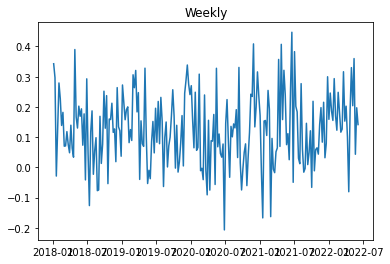

In [46]:
# 주별 어조지수
plt.plot(weekly_tone_index)
plt.title("Weekly")
plt.show()

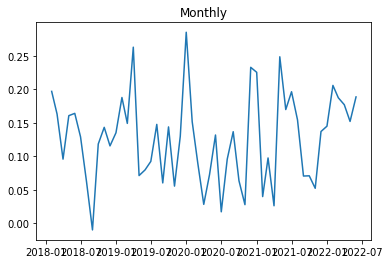

In [47]:
# 월별 어조지수
plt.plot(monthly_tone_index)
plt.title("Monthly")
plt.show()

In [68]:
# 뉴스기사 본문을 분석한다면? (단, "금리"라는 단어가 들어있는 문장만 포함)
# 문장단위로 분리하기 위한 패키지
from nltk import sent_tokenize

# 긍정 단어 수 
lst_npos = []
# 부정 단어 수
lst_nneg = []
# 어조지수
lst_tone = []

# 뉴스기사 본문을 포함
corpus = data["본문"].tolist()

for i in notebook.tqdm(range(len(corpus)), desc="뉴스기사 본문 분석"):
  contents = str(corpus[i])
  sentences = sent_tokenize(contents)

  # 해당 뉴스기사의 긍정, 부정 단어 수
  npos = nneg = 0

  for s in sentences:
    # 단어 "금리"가 들어간 문장만 분석
    if "금리" not in s:
      continue

    tokens = ksa.tokenize(s)
    score = ksa.get_score(tokens)
    npos += score["Positive"]
    nneg += score["Negative"]
  
  lst_npos.append(npos)
  lst_nneg.append(nneg)
  # 긍정, 부정 단어가 전혀 없는 경우
  if (npos + nneg) == 0:
    lst_tone.append(0)
  else:
    lst_tone.append((npos + nneg) / (npos - nneg))

data["긍정"] = lst_npos
data["부정"] = lst_nneg
data["어조"] = lst_tone

뉴스기사 본문 분석:   0%|          | 0/10000 [00:00<?, ?it/s]

In [69]:
data.head()

,날짜,언론사명,제목,본문,긍정,부정,어조
0,2018-01-01,파이낸셜뉴스,서울 아파트 4.69% 오를 때 지방은 0.41% 하락,5년여만에 전세가격 내려.. 수도권 1.4% 올라 대조적 지난해 전국 주택매매가격은...,44,-24,0.294118
1,2018-01-01,파이낸셜뉴스,지난해 서울 아파트값 4.69% 상승...수도권-지방 양극화 '뚜렷',지난해 전국 주택매매가격은 1.48% 상승했다. 상승률은 단독주택이 2.67%로 가...,44,-24,0.294118
2,2018-01-01,서울경제,"이채원 한국밸류운용 신임 대표 “""금리인상으로 가치주 시대 다시 열릴 것""”",지금껏 대형성장주 강세였지만중기 정책·4차 산업혁명 맞춰중소형주 종목 장세 전개 예...,63,-56,0.058824
3,2018-01-01,아시아경제,심상찮은 서울 집값 오름세…지난해 12월 0.59%↑,▲2017년 12월 기준 서울의 집값 오름세가 심상치 않다. 정부의 고강도 부동산 ...,46,-27,0.260274
4,2018-01-01,YTN,"올해 '코스피 3,000·코스닥 1,000 시대' 열까?",지난해 뜨거운 한 해를 보냈던 증시의 흐름은 올해까지 이어질 것이란 전망이 많습니다...,5,-2,0.428571


In [70]:
# 일별 어조지수 계산
daily_tone_index = data.groupby("날짜")["어조"].mean()
# 주별 어조지수
weekly_tone_index = daily_tone_index.groupby(pd.Grouper(freq="W")).mean()
# 월별 어조지수
monthly_tone_index = daily_tone_index.groupby(pd.Grouper(freq="M")).mean()

In [71]:
import matplotlib.pyplot as plt

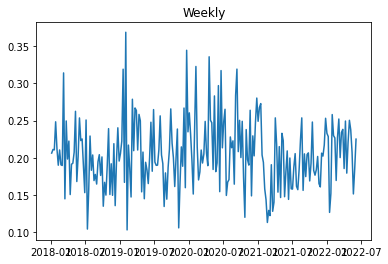

In [72]:
# 주별 어조지수
plt.plot(weekly_tone_index)
plt.title("Weekly")
plt.show()

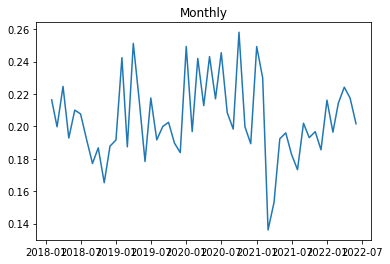

In [73]:
# 월별 어조지수
plt.plot(monthly_tone_index)
plt.title("Monthly")
plt.show()